In [11]:
import pandas as pd

from glob import glob
from natsort import natsorted

B_IN_MB = 1000000.0
BITS_IN_BYTE = 8.0

In [15]:
_file_name = 'iperf_LoS_WIGI_gargedoor_trial1.csv'
df = pd.read_csv(f"./{_file_name}")

In [16]:
df

,Time,IP-address,port,IP-address.1,port.1,num,rand,bytes,Throughput
0,20220705194423,192.168.1.2,37274,192.168.1.3,5001,1,0.0-1.0,195565108,1564520864
1,20220705194424,192.168.1.2,37274,192.168.1.3,5001,1,1.0-2.0,197027912,1576223296
2,20220705194425,192.168.1.2,37274,192.168.1.3,5001,1,2.0-3.0,183172000,1465376000
3,20220705194426,192.168.1.2,37274,192.168.1.3,5001,1,3.0-4.0,189654696,1517237568
4,20220705194427,192.168.1.2,37274,192.168.1.3,5001,1,4.0-5.0,194143496,1553147968
...,...,...,...,...,...,...,...,...,...
368,20220705195031,192.168.1.2,37274,192.168.1.3,5001,1,368.0-369.0,191723888,1533791104
369,20220705195032,192.168.1.2,37274,192.168.1.3,5001,1,369.0-370.0,194463504,1555708032
370,20220705195033,192.168.1.2,37274,192.168.1.3,5001,1,370.0-371.0,196261920,1570095360
371,20220705195033,192.168.1.2,37274,192.168.1.3,5001,1,371.0-371.6,104720808,1518108149


In [17]:
a = list(df['Time'][0:-1] - df['Time'].min())
b = list(df[' bytes'][0:-1] * BITS_IN_BYTE / B_IN_MB) 
# a = list(df.index[:-1])
# b = list(df[0][0:-1]) 

In [18]:
_file_out = _file_name.split(".")[0]

In [19]:
with open(f"./{_file_out}", "w") as file:
    for _i1, _i2 in zip(a,b):
        file.write(f"{_i1}\t{_i2}\n")
    file.close()

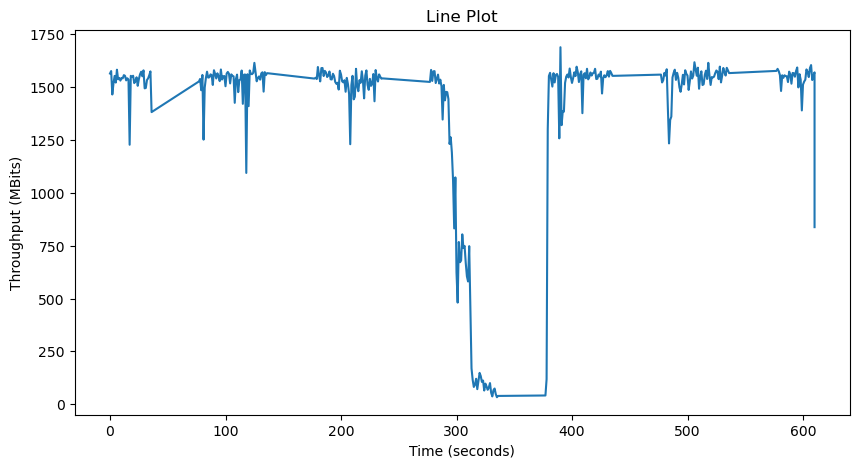

In [20]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
# Create a line plot
plt.plot(a, b)

# Adding title and labels
plt.title('Line Plot')
plt.xlabel('Time (seconds)')
plt.ylabel('Throughput (MBits)')

# Show the plot
# plt.show()
plt.savefig(f"./{_file_out}.png", dpi=600)
plt.show()

In [ ]:
plt